# Gabor Filters

Now that we've played around a bit with what the neural network thinks are good filters for ResNet50, can our own biological neural network come up with a set of 64 **better** filters? Probably not!

Gabor filters are linear filters used for edge detection and texture analysis. We're hoping that we can manually create some filters and use them as the first layer of our neural network.

## Creating a Gabor Filter

A gabor filter can be created via this function: ![](https://i.imgur.com/3u8H6VF.png)

Here is what they tell me these letters mean:
 - **x** The width of the desired filter
 - **y** The height of the desired filter
 - **σ** The standard deviation of the Gaussian function. Increasing it causes more lines in the filter.
 - **Θ** The filter orientation/rotation
 - **λ** The wavelength of the sinusoidal factor
 - **γ** The spatial aspect factor (???)
 - **ψ** The phase offset
 
 


I'm following [this paper]() which used these settings for those letters:

![image.png](https://i.imgur.com/qUeWLUG.png)

They created `5x5` filters, so we'll do the same to sanity check that we're not messing everything up.

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

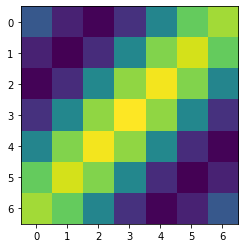

In [362]:
ksize = (7, 7)
sigma = 3
theta = 1 * np.pi / 4
lambd = 8 * np.pi / 4
gamma = 0.5
phi = 0

result = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi=0,  ktype=cv2.CV_32F)
plt.imshow(result)

## Creating a filter bank

We have to create 64 kernels. My plan is to have:
 - 16 Black and White kernels
 - 16 Red and Green kernels
 - 16 Red and Blue kernels
 - 16 Green and Blue Kernels

For a set of 16 kernels we will have:
 - 8 light to dark
 - 8 dark to light
 
For a set of 8 kernels we will have:


In [389]:
def generate_filter_bank():
    """ 
    Generates 16 Gabor filters by varying theta (rotation) and lambda (wavelength)
    """

    ksize = (7, 7)
    sigma = 3
    gamma = 0.75
    phi = 0
    
    lambd_1 = 1 * np.pi / 4
    lambd_2 = 4 * np.pi / 4
    
    theta_1 = 1 * np.pi / 4
    theta_2 = 2 * np.pi / 4
    theta_3 = 3 * np.pi / 4
    theta_4 = 4 * np.pi / 4
    
    thetas = [theta_1, theta_2, theta_3, theta_4]
    lambds = [lambd_1, lambd_2]
    
    filters = []
    
    for theta in thetas:
        for lambd in lambds:
            filter = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi=0,  ktype=cv2.CV_32F)
            filters.append(filter)
            
    filters = np.array(filters)
    # Add inverted filters
    inverted_filters = filters[:] * -1
    return np.concatenate((filters, inverted_filters))
        

In [390]:
filters = generate_filter_bank()

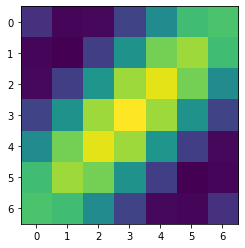

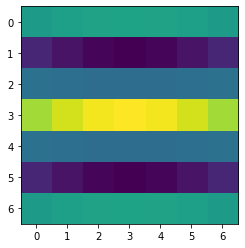

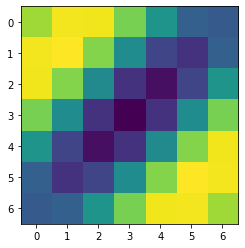

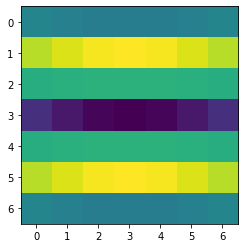

In [369]:
# sample filters
plt.imshow(filters[0])
plt.show()
plt.imshow(filters[2])
plt.show()
plt.imshow(filters[8])
plt.show()
plt.imshow(filters[10])
plt.show()

In [370]:
import torch

In [391]:
weights = torch.zeros((64,7,7,3))

In [385]:
#filters = np.expand_dims(filters, -1)

In [393]:
# Set black and white gabor filters
weights[:16,:,:,0] = torch.from_numpy(filters)
weights[:16,:,:,1] = torch.from_numpy(filters)
weights[:16,:,:,2] = torch.from_numpy(filters)

# Set red and green gabor filters
weights[16:32,:,:,0] = torch.from_numpy(filters)
weights[16:32,:,:,1] = torch.from_numpy(filters)

# Set red and blue gabor filters
weights[32:48,:,:,0] = torch.from_numpy(filters)
weights[32:48,:,:,2] = torch.from_numpy(filters)

# Set green and blue gabor filters
weights[48:,:,:,1] = torch.from_numpy(filters)
weights[48:,:,:,2] = torch.from_numpy(filters)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


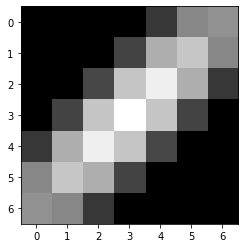

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


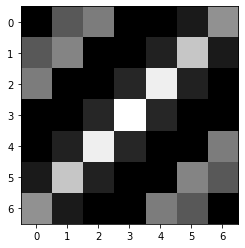

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


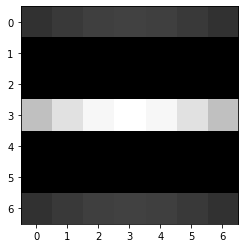

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


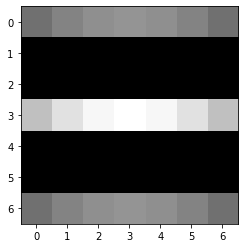

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


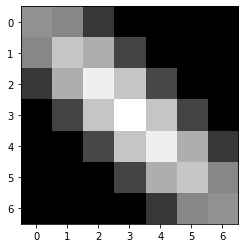

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


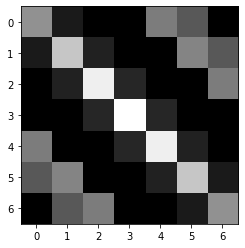

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


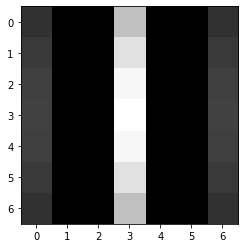

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


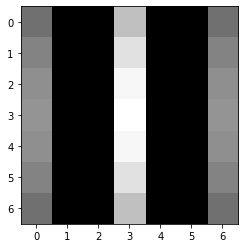

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


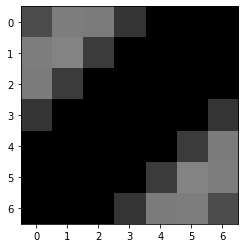

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


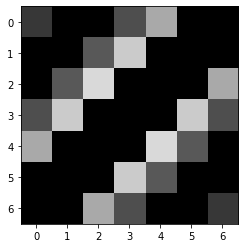

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


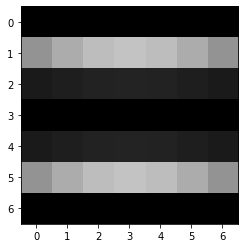

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


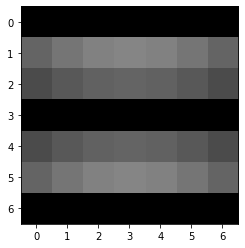

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


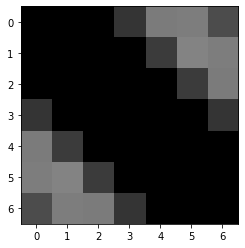

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


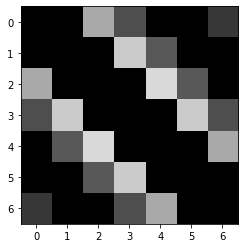

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


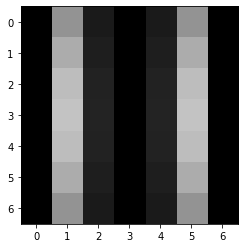

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


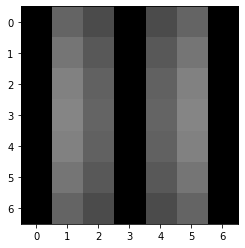

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


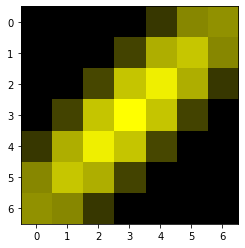

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


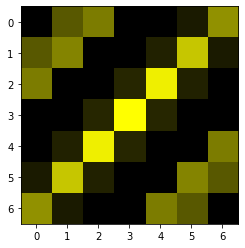

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


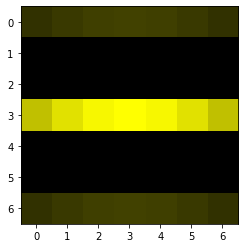

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


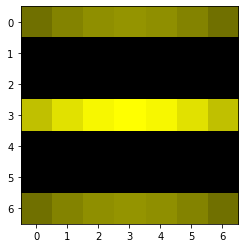

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


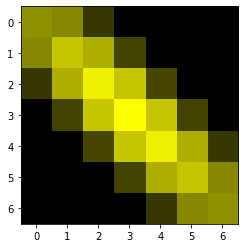

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


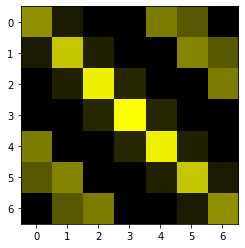

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


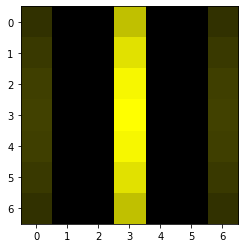

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


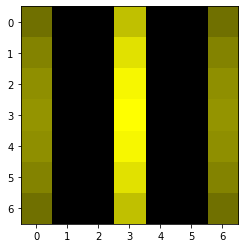

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


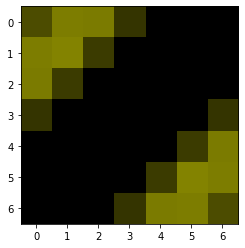

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


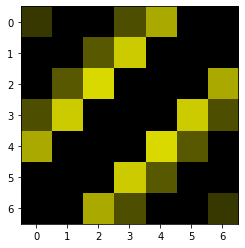

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


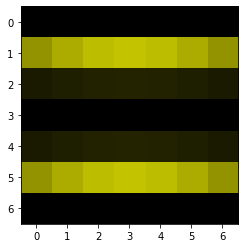

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


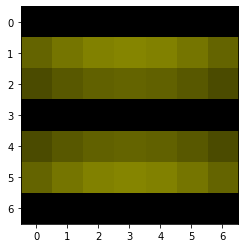

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


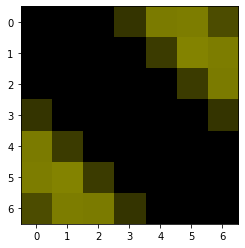

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


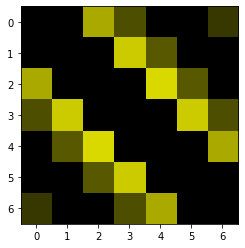

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


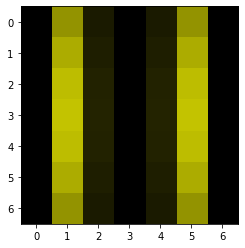

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


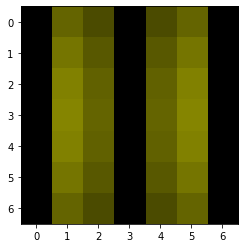

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


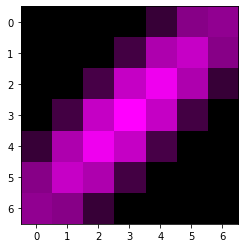

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


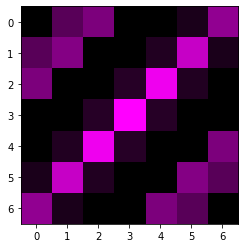

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


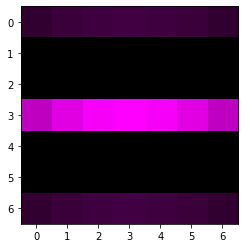

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


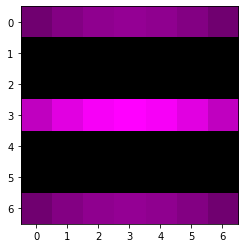

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


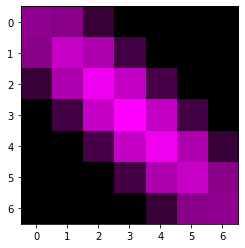

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


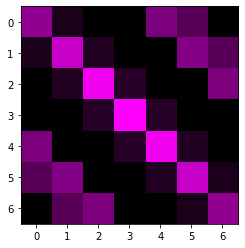

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


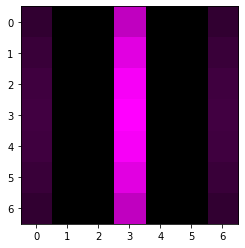

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


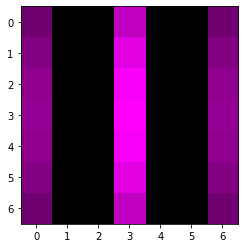

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


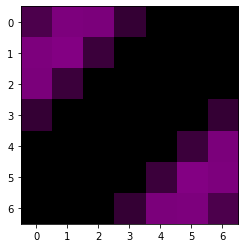

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


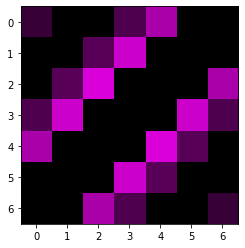

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


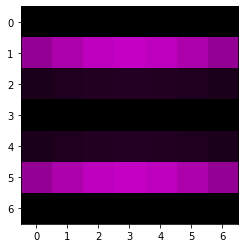

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


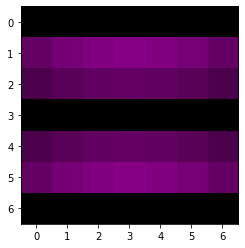

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


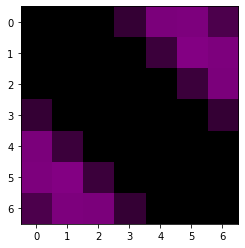

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


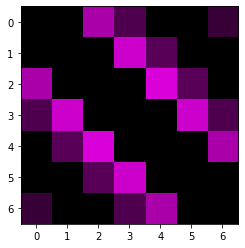

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


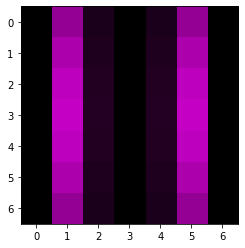

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


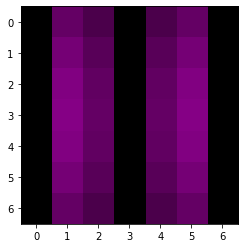

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


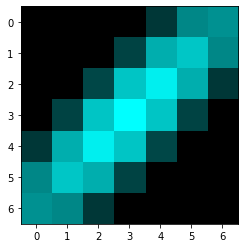

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


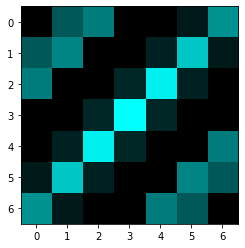

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


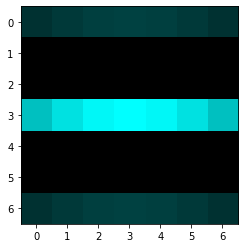

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


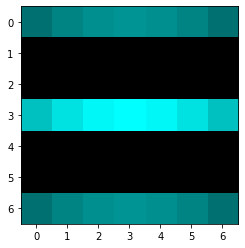

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


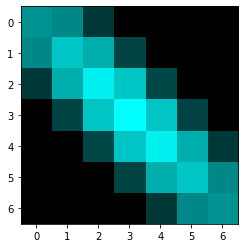

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


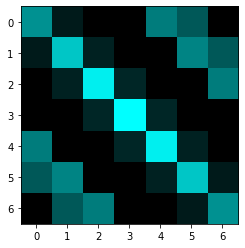

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


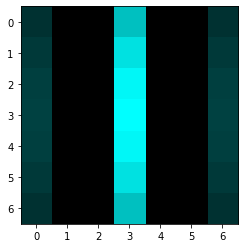

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


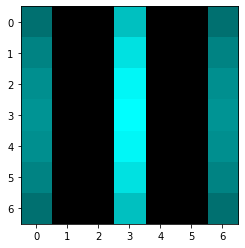

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


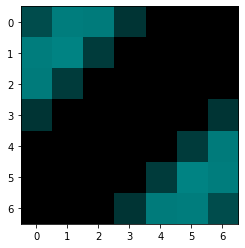

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


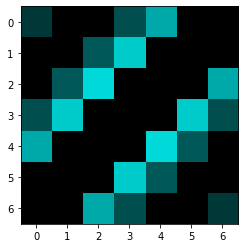

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


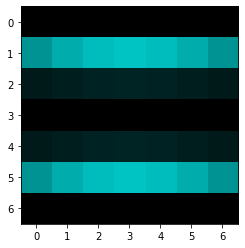

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


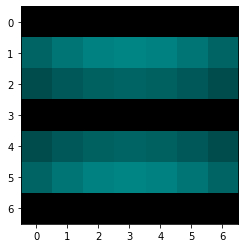

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


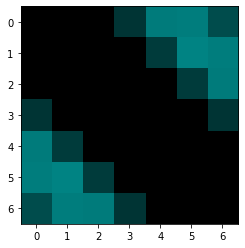

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


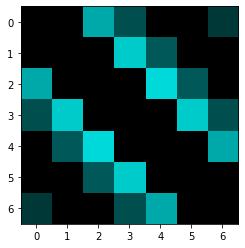

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


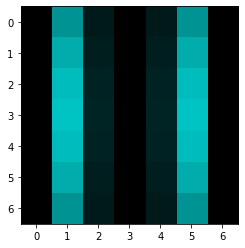

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


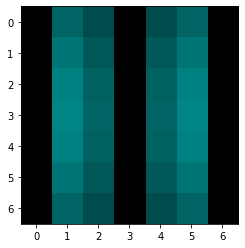

In [396]:
for weight in weights:
    plt.imshow(weight)
    plt.show()